**1. Importing all the essential libraries**

In [ ]:
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics

**2. Loading the data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sentences = pd.read_csv('/content/drive/MyDrive/ML_Innovative/sentences.csv', sep='\t', header= None, names =  ['id', 'lang', 'sentence'])

In [ ]:
sentences.head(10)

,id,lang,sentence
0,1,cmn,我們試試看！
1,2,cmn,我该去睡觉了。
2,3,cmn,你在干什麼啊？
3,4,cmn,這是什麼啊？
4,5,cmn,今天是６月１８号，也是Muiriel的生日！
5,6,cmn,生日快乐，Muiriel！
6,7,cmn,Muiriel现在20岁了。
7,8,cmn,"密码是""Muiriel""。"
8,9,cmn,我很快就會回來。
9,10,cmn,我不知道。


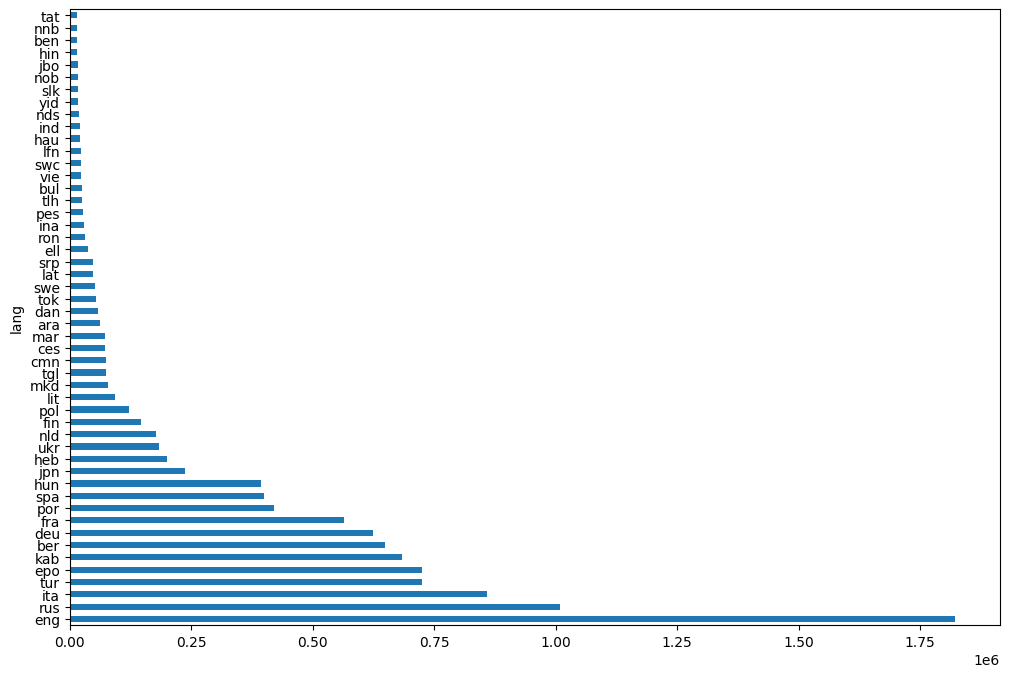

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 8))
sentences.groupby('lang')['lang'].count().sort_values(ascending=False)[:50].plot(kind= 'barh');


In [ ]:
lang_count=sentences.groupby('lang')['lang'].count()
language_count=lang_count.to_frame()
language_count

,lang
lang,
\N,410
abk,28
acm,49
ady,31
afb,126
...,...
zgh,3635
zlm,2263
zsm,7357


1) English  eng
2) Russian   rus
3) Italian    ita
4) Turkish	  tur
5) German	deu
6) Spanish	spa
7) French	fra
8) Portuguese	por
9) Hungarian	hun
10) Japanese	jpn
11) Ukrainian	ukr
12) Dutch	nld
13) Polish	pol
14) Marathi		mar
15) Arabic	ara
16) Swedish		swe
17) Latin	lat
18) Greek	ell
19) Romanian	ron
20) Persian		pes
21) Bulgarian	bul
22) Vietnamese	vie
23) Indonesian	ind
24) Hindi	hin
25) Bengali	ben
26) Korean 11544  kor

In [ ]:
languages = ["eng", "rus", "ita", "tur", "deu", "spa", "fra", "por", "hun", "jpn", "ukr", "nld", "pol", "mar", "ara", "swe", "lat", "ell", "ron", "pes", "bul", "vie", "ind", "hin", "ben", "kor"]
language_subsets = {}
num_sentences = 11544
for lang in languages:
    subset = sentences[sentences["lang"] == lang][:num_sentences]
    language_subsets[lang] = subset


In [ ]:
frames = [language_subsets[lang] for lang in languages]
df = pd.concat(frames)
language_counts = df['lang'].value_counts()
print(language_counts)
df.head()

eng    11544
rus    11544
ben    11544
hin    11544
ind    11544
vie    11544
bul    11544
pes    11544
ron    11544
ell    11544
lat    11544
swe    11544
ara    11544
mar    11544
pol    11544
nld    11544
ukr    11544
jpn    11544
hun    11544
por    11544
fra    11544
spa    11544
deu    11544
tur    11544
ita    11544
kor    11544
Name: lang, dtype: int64


,id,lang,sentence
1232,1276,eng,Let's try something.
1233,1277,eng,I have to go to sleep.
1235,1280,eng,Today is June 18th and it is Muiriel's birthday!
1236,1282,eng,Muiriel is 20 now.
1237,1283,eng,"The password is ""Muiriel""."


**3. Data Preprocessing**

In [ ]:
for char in string.punctuation:
    print(char, end = ' ')
translate_table = dict((ord(char), None) for char in string.punctuation)

! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~ 

In [ ]:
data = []
language = []
ind=[]
for lang,lines in df.iterrows():

    line = lines['sentence']
    if len(line) !=0:
        line = line.lower()
        line = line.translate(translate_table)
        data.append(line)
        language.append(lines['lang'])
        ind.append(lines['id'])

In [ ]:
finaldf = pd.DataFrame({
    "id":ind,
    "lang": language,
    "sentence" : data
})
# shuffle the DataFrame rows
finaldf = finaldf.sample(frac = 1)
finaldf.head()

,id,lang,sentence
127011,5986,nld,het onderwijs in deze wereld valt me tegen
174075,892795,swe,varför inte ansöka om jobbet som tolk
248640,3306936,vie,người đàn ông thực uống trà
148301,404433,pol,nie mam zdolności politycznych
121243,494806,ukr,бачу отже вірю


**5. Splitting the dataset**

In [ ]:
x = finaldf.iloc[:,2] # Independent Variable sentence
y = finaldf.iloc[:,1] # Dependent Variable language

In [ ]:
y.head()

127011    nld
174075    swe
248640    vie
148301    pol
121243    ukr
Name: lang, dtype: object

In [ ]:
x.head()

127011    het onderwijs in deze wereld valt me tegen
174075         varför inte ansöka om jobbet som tolk
248640                   người đàn ông thực uống trà
148301                nie mam zdolności politycznych
121243                               бачу  отже вірю
Name: sentence, dtype: object

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(x_train[:2], x_test[:2], y_train[:2], y_test[:2])

247593    có ai đó đã gửi thông điệp này và tôi sẽ là ng...
259126    tom tidak berpikir kalau dia akan bisa menyele...
Name: sentence, dtype: object 29999     ho comprato un poster allistituto del mondo ar...
261538             jangan mengkhawatirkan tentang masa lalu
Name: sentence, dtype: object 247593    vie
259126    ind
Name: lang, dtype: object 29999     ita
261538    ind
Name: lang, dtype: object


In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((240115,), (240115,), (60029,), (60029,))

**LOGISTIC REGRESSION**

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,3), analyzer='char')

In [ ]:
model = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', LogisticRegression())
])

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', LogisticRegression())])

In [ ]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

In [ ]:
print("Accuracy is :",accuracy)

Accuracy is : 0.9920538406436888


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ara       1.00      1.00      1.00      2281
         ben       1.00      1.00      1.00      2315
         bul       0.98      0.99      0.99      2316
         deu       0.99      0.99      0.99      2282
         ell       1.00      1.00      1.00      2289
         eng       0.99      0.99      0.99      2285
         fra       0.99      0.99      0.99      2357
         hin       1.00      0.99      1.00      2379
         hun       0.99      1.00      0.99      2342
         ind       0.99      1.00      0.99      2284
         ita       0.98      0.99      0.99      2253
         jpn       1.00      1.00      1.00      2314
         kor       1.00      1.00      1.00      2311
         lat       0.98      0.99      0.98      2316
         mar       0.99      1.00      1.00      2311
         nld       0.99      0.99      0.99      2317
         pes       1.00      1.00      1.00      2417
         pol       1.00    

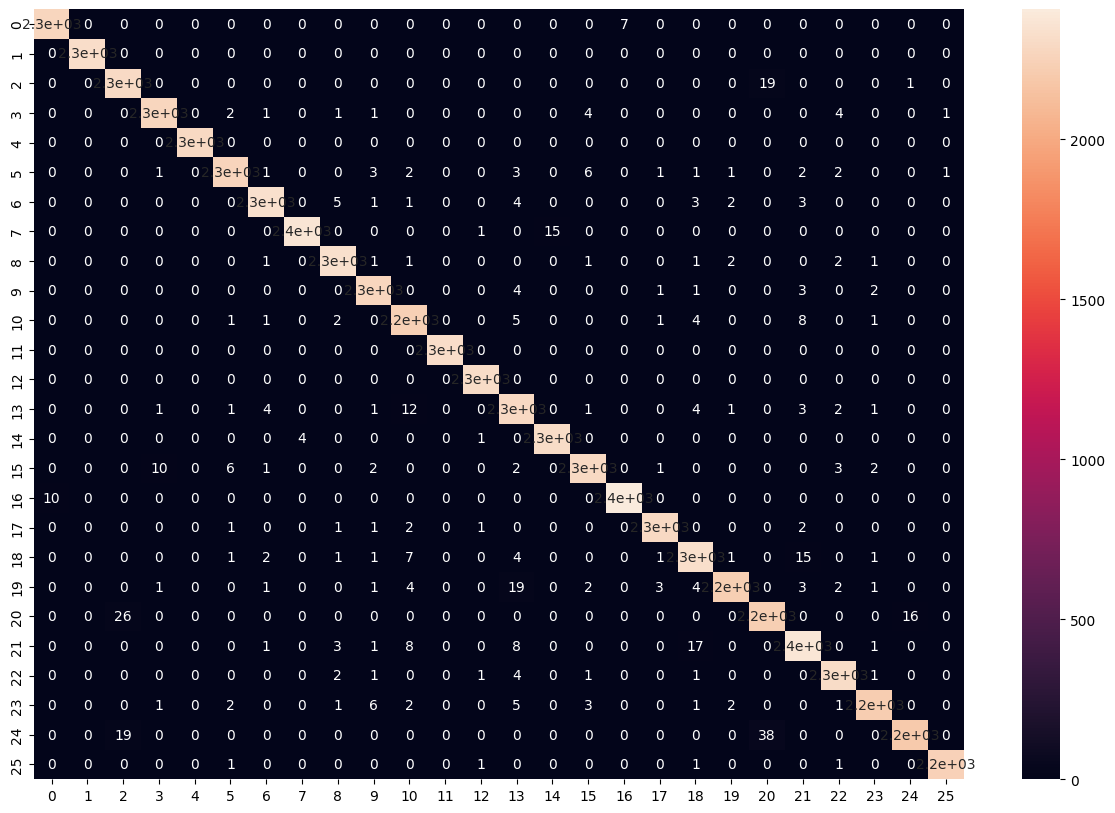

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
def predict(text):
    lang = model.predict([text])
    print('The Language is in',lang[0])


In [ ]:
# English
predict("LANGUAGE DETECTION MODEL CHECK")
# French
predict("VÉRIFICATION DU MODÈLE DE DÉTECTION DE LA LANGUE")
# Arabic
predict("توففحص نموذج الكشف عن اللغة")
# Spanish
predict("VERIFICACIÓN DEL MODELO DE DETECCIÓN DE IDIOMAS")
# Malayalam
predict("ലാംഗ്വേജ് ഡിറ്റക്ഷൻ മോഡൽ ചെക്ക്")
# Russian
predict("ПРОВЕРКА МОДЕЛИ ОПРЕДЕЛЕНИЯ ЯЗЫКА")
# Hindi
predict('भाषा का पता लगाने वाले मॉडल की जांच')
# Hindi
predict(' boyit9h एनालिटिक्स alhgserog 90980879809 bguytfivb ahgseporiga प्रदान करता है')


The Language is in eng
The Language is in fra
The Language is in ara
The Language is in spa
The Language is in vie
The Language is in rus
The Language is in mar
The Language is in hin


In [ ]:
!pip install joblib


In [ ]:
import joblib
joblib.dump(model, '/content/drive/MyDrive/ML_Innovative/LogisticRegression.pkl')

['/content/drive/MyDrive/ML_Innovative/LogisticRegression.pkl']

**MULTINOMIAL NAIVEBAYES**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(x).toarray()
X.shape

(13000, 27189)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [ ]:
print("Accuracy is :",ac)

Accuracy is : 0.9389423076923077


In [ ]:
print(cr)

              precision    recall  f1-score   support

         ara       0.99      0.84      0.91       165
         ben       1.00      0.97      0.98       153
         bul       0.95      0.94      0.95       156
         deu       0.99      0.99      0.99       155
         ell       1.00      0.97      0.98       166
         eng       0.96      0.99      0.97       172
         fra       0.94      0.98      0.96       170
         hin       0.96      0.92      0.94       170
         hun       1.00      0.88      0.94       161
         ind       0.97      1.00      0.98       147
         ita       0.94      0.92      0.93       142
         jpn       0.54      1.00      0.70       157
         kor       1.00      0.81      0.90       153
         lat       0.86      0.87      0.87       132
         mar       0.97      0.91      0.94       160
         nld       0.95      0.99      0.97       167
         pes       0.96      0.98      0.97       161
         pol       0.99    

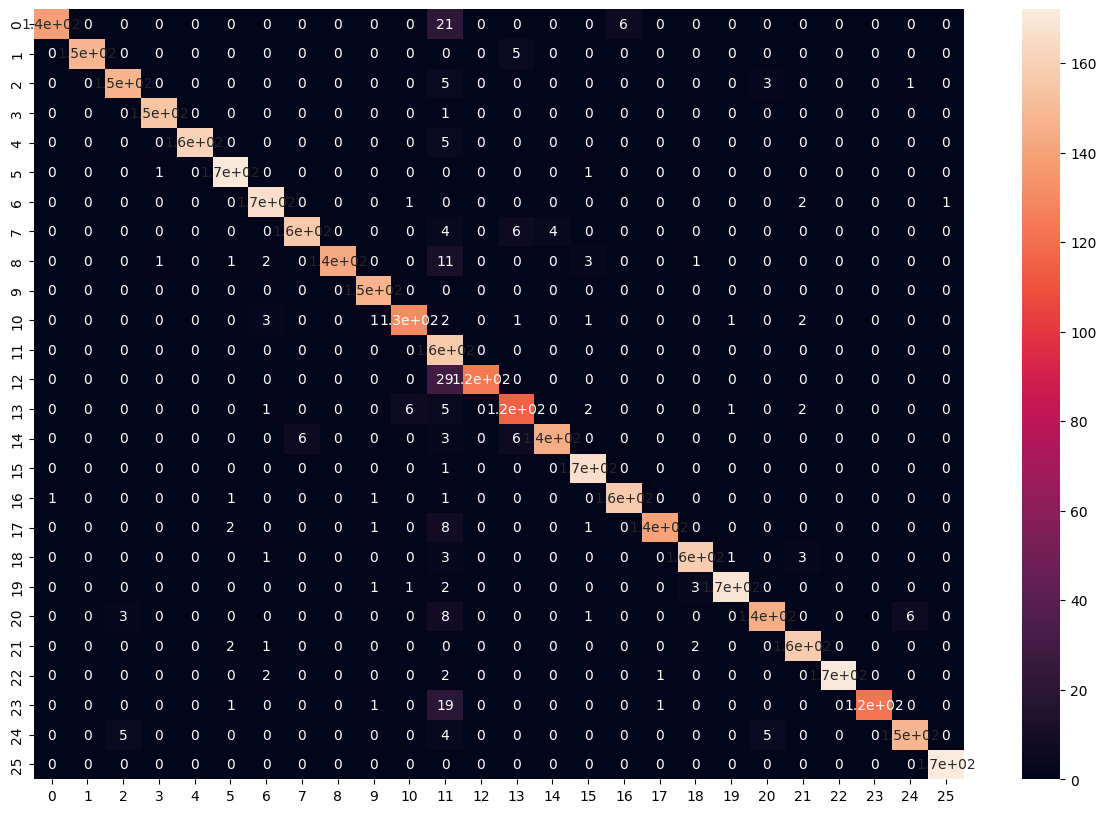

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
def predict(text_list):
    # Initialize an empty list to store the predicted languages
    languages = []

    for text in text_list:
        vectorized = cv.transform([text]).toarray()
        lang = model.predict(vectorized)
        languages.append(lang[0])

    return languages

# Now you can use your predict function with a list of texts you want to predict.
texts_to_predict = [
    "LANGUAGE DETECTION MODEL CHECK",   #eng
    "VÉRIFICATION DU MODÈLE DE DÉTECTION DE LA LANGUE",  #french
    "توففحص نموذج الكشف عن اللغة",    #arabic
    "VERIFICACIÓN DEL MODELO DE DETECCIÓN DE IDIOMAS",  #spanish
    "ലാംഗ്വേജ് ഡിറ്റക്ഷൻ മോഡൽ ചെക്ക്", #malyalam
    "ПРОВЕРКА МОДЕЛИ ОПРЕДЕЛЕНИЯ ЯЗЫКА",      #russian
    "भाषा का पता लगाने वाले मॉडल की जांच",        #hindi
    " boyit9h एनालिटिक्स alhgserog 90980879809 bguytfivb ahgseporiga प्रदान करता है" #hindi
]

predicted_languages = predict(texts_to_predict)
print("Predicted Languages:", predicted_languages)


Predicted Languages: ['eng', 'fra', 'ara', 'spa', 'lat', 'lat', 'hin', 'hin']


In [ ]:
import joblib
joblib.dump(model, '/content/drive/MyDrive/ML_Innovative/MultinomialNB.pkl')


['/content/drive/MyDrive/ML_Innovative/MultinomialNB.pkl']

**SVM**

In [ ]:
svm_model = SVC(kernel='linear',probability=True)  # You can choose different kernels as well
svm_model.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svm_model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.818076923076923
Classification Report:
              precision    recall  f1-score   support

         ara       0.97      0.73      0.84        98
         ben       1.00      0.92      0.96        89
         bul       0.96      0.82      0.89        96
         deu       1.00      0.88      0.94       103
         ell       1.00      0.90      0.95       122
         eng       0.99      0.87      0.93       103
         fra       0.99      0.88      0.93       104
         hin       0.95      0.93      0.94       102
         hun       0.96      0.76      0.85       101
         ind       1.00      0.87      0.93       111
         ita       0.88      0.87      0.87        97
         jpn       0.17      1.00      0.29        83
         kor       1.00      0.43      0.60        95
         lat       0.96      0.69      0.80       105
         mar       0.98      0.86      0.91       105
         nld       0.98      0.88      0.92        96
         pes       1.00      0

In [ ]:
import joblib
joblib.dump(svm_model, '/content/drive/MyDrive/ML_Innovative/SVM.pkl')


['/content/drive/MyDrive/ML_Innovative/SVM.pkl']

**Decision Tree**

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt_model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.7211538461538461
Classification Report:
              precision    recall  f1-score   support

         ara       0.94      0.73      0.82        98
         ben       0.16      1.00      0.28        89
         bul       0.79      0.76      0.78        96
         deu       0.95      0.82      0.88       103
         ell       1.00      0.86      0.93       122
         eng       0.99      0.78      0.87       103
         fra       0.89      0.68      0.77       104
         hin       0.91      0.88      0.90       102
         hun       0.96      0.73      0.83       101
         ind       0.99      0.85      0.91       111
         ita       0.71      0.74      0.73        97
         jpn       1.00      0.01      0.02        83
         kor       1.00      0.42      0.59        95
         lat       0.77      0.61      0.68       105
         mar       0.93      0.77      0.84       105
         nld       0.72      0.81      0.76        96
         pes       0.99      

In [ ]:
import joblib
joblib.dump(dt_model, '/content/drive/MyDrive/ML_Innovative/DecisionTree.pkl')


['/content/drive/MyDrive/ML_Innovative/DecisionTree.pkl']

mnb with tfid

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,3), analyzer='char')

In [ ]:
model = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', MultinomialNB())
])

In [ ]:
model.fit(x_train,y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', MultinomialNB())])

In [ ]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

In [ ]:
print("Accuracy is :",accuracy)

Accuracy is : 0.9889685314685315


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ara       1.00      0.99      1.00      2241
         ben       1.00      1.00      1.00      2249
         bul       0.99      0.98      0.99      2226
         deu       0.99      0.99      0.99      2165
         ell       1.00      1.00      1.00      2198
         eng       0.98      1.00      0.99      2183
         fra       0.98      0.99      0.99      2196
         hin       0.99      1.00      0.99      2206
         hun       1.00      0.99      0.99      2217
         ind       0.98      0.99      0.99      2149
         ita       0.94      0.99      0.97      2115
         jpn       1.00      1.00      1.00      2189
         kor       1.00      1.00      1.00      2239
         lat       0.98      0.94      0.96      2247
         mar       1.00      0.99      0.99      2190
         nld       0.99      0.99      0.99      2182
         pes       0.99      1.00      1.00      2192
         pol       1.00    

In [ ]:
def predict(text):
    lang = model.predict([text])
    print('The Language is in',lang[0])

In [ ]:
# English
predict("LANGUAGE DETECTION MODEL CHECK")
# French
predict("VÉRIFICATION DU MODÈLE DE DÉTECTION DE LA LANGUE")
# Arabic
predict("توففحص نموذج الكشف عن اللغة")
# Spanish
predict("VERIFICACIÓN DEL MODELO DE DETECCIÓN DE IDIOMAS")
# Malayalam
predict("ലാംഗ്വേജ് ഡിറ്റക്ഷൻ മോഡൽ ചെക്ക്")
# Russian
predict("ПРОВЕРКА МОДЕЛИ ОПРЕДЕЛЕНИЯ ЯЗЫКА")
# Hindi
predict('भाषा का पता लगाने वाले मॉडल की जांच')
# Hindi
predict(' boyit9h एनालिटिक्स alhgserog 90980879809 bguytfivb ahgseporiga प्रदान करता है')


The Language is in eng
The Language is in fra
The Language is in ara
The Language is in spa
The Language is in eng
The Language is in rus
The Language is in hin
The Language is in hin


In [ ]:
import joblib
joblib.dump(model, '/content/drive/MyDrive/ML_Innovative/MultinomialNB_TFID.pkl')

['/content/drive/MyDrive/ML_Innovative/MultinomialNB_TFID.pkl']

svm with tfid

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,3), analyzer='char')

In [ ]:
svm_tfid = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf',SVC(kernel='linear',probability=True))
])

In [ ]:
svm_tfid.fit(x_train,y_train)

In [ ]:

y_pred = svm_tfid.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

In [ ]:
print("Accuracy is :",accuracy)

Accuracy is : 0.99430275366906


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ara       1.00      1.00      1.00      2325
         ben       1.00      1.00      1.00      2336
         bul       0.99      0.99      0.99      2359
         deu       1.00      1.00      1.00      2289
         ell       1.00      1.00      1.00      2218
         eng       1.00      1.00      1.00      2298
         fra       1.00      0.99      1.00      2273
         hin       1.00      1.00      1.00      2334
         hun       1.00      1.00      1.00      2284
         ind       1.00      0.99      1.00      2371
         ita       0.98      0.99      0.98      2313
         jpn       1.00      1.00      1.00      2274
         kor       1.00      1.00      1.00      2331
         lat       0.98      0.99      0.98      2311
         mar       1.00      1.00      1.00      2355
         nld       1.00      1.00      1.00      2366
         pes       1.00      1.00      1.00      2250
         pol       1.00    

In [ ]:
def predict(text):
    lang = svm_tfid.predict([text])
    print('The Language is in',lang[0])

In [ ]:
# English
predict("LANGUAGE DETECTION MODEL CHECK")
# French
predict("VÉRIFICATION DU MODÈLE DE DÉTECTION DE LA LANGUE")
# Arabic
predict("توففحص نموذج الكشف عن اللغة")
# Spanish
predict("VERIFICACIÓN DEL MODELO DE DETECCIÓN DE IDIOMAS")
# Malayalam
predict("ലാംഗ്വേജ് ഡിറ്റക്ഷൻ മോഡൽ ചെക്ക്")
# Russian
predict("ПРОВЕРКА МОДЕЛИ ОПРЕДЕЛЕНИЯ ЯЗЫКА")
# Hindi
predict('भाषा का पता लगाने वाले मॉडल की जांच')
# Hindi
predict(' boyit9h एनालिटिक्स alhgserog 90980879809 bguytfivb ahgseporiga प्रदान करता है')


The Language is in eng
The Language is in fra
The Language is in ara
The Language is in spa
The Language is in vie
The Language is in rus
The Language is in mar
The Language is in hin


In [ ]:
import joblib
joblib.dump(svm_tfid, '/content/drive/MyDrive/ML_Innovative/SVM_TFID.pkl')

['/content/drive/MyDrive/ML_Innovative/SVM_TFID.pkl']

dt with tfid

In [ ]:
dt_tfid = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf',DecisionTreeClassifier())
])

In [ ]:
dt_tfid.fit(x_train,y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', DecisionTreeClassifier())])

In [ ]:
y_pred = dt_tfid.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

In [ ]:
print("Accuracy is :",accuracy)

Accuracy is : 0.9253194289426777


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ara       0.99      0.99      0.99      2325
         ben       1.00      1.00      1.00      2336
         bul       0.94      0.94      0.94      2359
         deu       0.90      0.88      0.89      2289
         ell       1.00      1.00      1.00      2218
         eng       0.89      0.88      0.89      2298
         fra       0.89      0.88      0.89      2273
         hin       0.99      0.98      0.98      2334
         hun       0.92      0.92      0.92      2284
         ind       0.91      0.92      0.91      2371
         ita       0.85      0.86      0.86      2313
         jpn       1.00      1.00      1.00      2274
         kor       1.00      1.00      1.00      2331
         lat       0.83      0.82      0.82      2311
         mar       0.98      0.99      0.99      2355
         nld       0.90      0.89      0.90      2366
         pes       0.99      0.99      0.99      2250
         pol       0.92    

In [ ]:
def predict(text):
    lang = dt_tfid.predict([text])
    print('The Language is in',lang[0])

In [ ]:
# English
predict("LANGUAGE DETECTION MODEL CHECK")
# French
predict("VÉRIFICATION DU MODÈLE DE DÉTECTION DE LA LANGUE")
# Arabic
predict("توففحص نموذج الكشف عن اللغة")
# Spanish
predict("VERIFICACIÓN DEL MODELO DE DETECCIÓN DE IDIOMAS")
# Malayalam
predict("ലാംഗ്വേജ് ഡിറ്റക്ഷൻ മോഡൽ ചെക്ക്")
# Russian
predict("ПРОВЕРКА МОДЕЛИ ОПРЕДЕЛЕНИЯ ЯЗЫКА")
# Hindi
predict('भाषा का पता लगाने वाले मॉडल की जांच')
# Hindi
predict(' boyit9h एनालिटिक्स alhgserog 90980879809 bguytfivb ahgseporiga प्रदान करता है')


The Language is in pol
The Language is in fra
The Language is in ara
The Language is in spa
The Language is in kor
The Language is in rus
The Language is in mar
The Language is in mar


In [ ]:
import joblib
joblib.dump(dt_tfid, '/content/drive/MyDrive/ML_Innovative/DT_TFID.pkl')

['/content/drive/MyDrive/ML_Innovative/DT_TFID.pkl']

In [ ]:
import joblib
loaded_LR_model = joblib.load('/content/drive/MyDrive/ML_Innovative/LogisticRegression.pkl')
loaded_SVM_model = joblib.load('/content/drive/MyDrive/ML_Innovative/SVM_TFID.pkl')
loaded_DT_model = joblib.load('/content/drive/MyDrive/ML_Innovative/DT_TFID.pkl')
loaded_MNB_model = joblib.load('/content/drive/MyDrive/ML_Innovative/MultinomialNB_TFID.pkl')


In [ ]:
Evaluation_Results = pd.DataFrame(np.zeros((4,4)), columns=['Accuracy', 'Precision','Recall','F1-score'])
Evaluation_Results.index=['Logistic Regression (LR)','Decision Tree Classifier (DT)','Naïve Bayes Classifier (NB)',
                         'Support Vector Machine (SVM)']
Evaluation_Results

,Accuracy,Precision,Recall,F1-score
Logistic Regression (LR),0.0,0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0
Naïve Bayes Classifier (NB),0.0,0.0,0.0,0.0
Support Vector Machine (SVM),0.0,0.0,0.0,0.0


In [ ]:
!pip install scikit-plot


In [ ]:
from scikitplot.metrics import plot_roc_curve as auc_roc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, precision_score, recall_score

In [ ]:
def Classification_Summary(pred,i):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(y_test, pred),3)*100
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(y_test, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['Recall']=round(recall_score(y_test, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(y_test, pred, average='weighted'),3)*100 #

    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(y_test, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(y_test, pred, average='weighted'),3)*100)) #
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(y_test, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(y_test, pred))


In [ ]:
pred = loaded_LR_model.predict(x_test)
Classification_Summary(pred,0)

<<<----------------------------------- Evaluating Logistic Regression (LR) ----------------------------------->>>

Accuracy = 99.5%
F1 Score = 99.5%

 Confusiton Matrix:
 [[2330    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    4    0    0    0    0    0    0    0    0    0]
 [   0 2301    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 2248    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   17    0    0    0    2    0]
 [   0    0    0 2266    0    0    0    0    0    0    0    0    0    1
     0    0    0    0    0    0    0    1    1    0    0    0]
 [   0    0    0    0 2370    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    1    0 2311    0    0    1    3    3    0    0    4
     0    1    0    1    0    0    0    2    2    0    0    0]
 [   0    0    0   

In [ ]:
pred = loaded_DT_model.predict(x_test)
Classification_Summary(pred,1)

<<<----------------------------------- Evaluating Decision Tree Classifier (DT) ----------------------------------->>>

Accuracy = 98.5%
F1 Score = 98.5%

 Confusiton Matrix:
 [[2331    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    3    0    0    0    0    0    0    0    0    0]
 [   0 2299    0    0    0    0    0    1    0    0    0    0    1    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 2232    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   22    0    0    0   13    0]
 [   0    0    0 2196    0   11    8    0    3    1    1    0    0    4
     0    8    0   11    4    4    0    6    3    9    0    0]
 [   0    0    0    0 2370    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    8    0 2271    6    0    2    4    4    0    0    6
     0    7    0    7    2    2    0    5    3    2    0    0]
 [   0    0   

In [ ]:
pred = loaded_MNB_model.predict(x_test)
Classification_Summary(pred,2)

<<<----------------------------------- Evaluating Naïve Bayes Classifier (NB) ----------------------------------->>>

Accuracy = 99.0%
F1 Score = 99.0%

 Confusiton Matrix:
 [[2321    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0   13    0    0    0    0    0    0    0    0    0]
 [   0 2301    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 2230    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   33    0    0    0    4    0]
 [   0    0    0 2260    0    6    0    0    0    0    0    0    0    0
     0    1    0    0    0    0    0    1    1    0    0    0]
 [   0    0    0    0 2370    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    1    0 2321    1    0    0    2    1    0    0    1
     0    0    0    1    0    1    0    0    0    0    0    0]
 [   0    0    0

In [ ]:
pred = loaded_SVM_model.predict(x_test)
Classification_Summary(pred,3)

<<<----------------------------------- Evaluating Support Vector Machine (SVM) ----------------------------------->>>

Accuracy = 99.8%
F1 Score = 99.8%

 Confusiton Matrix:
 [[2332    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    2    0    0    0    0    0    0    0    0    0]
 [   0 2301    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 2257    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    9    0    0    0    1    0]
 [   0    0    0 2267    0    1    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    1    0    0    0    0]
 [   0    0    0    0 2370    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 2325    0    0    0    0    1    0    0    2
     0    0    0    0    0    0    0    1    0    0    0    0]
 [   0    0    

                                    ML Algorithms Comparison                                    


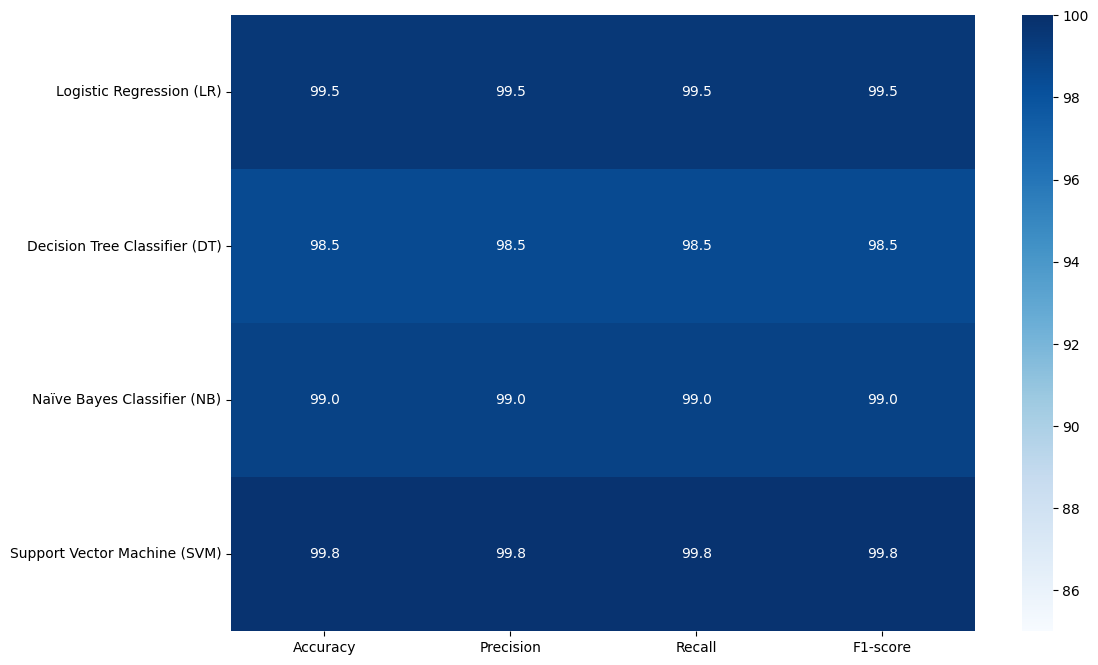

In [ ]:
print('\033[1mML Algorithms Comparison'.center(100))
plt.figure(figsize=[12,8])
sns.heatmap(Evaluation_Results, annot=True, vmin=85, vmax=100, cmap='Blues', fmt='.1f')
plt.show()

In [ ]:
def predict(text):
    lang = model.predict([text])
    print('The Language is in',lang[0])

In [ ]:
# English
predict("LANGUAGE DETECTION MODEL CHECK")
# French
predict("VÉRIFICATION DU MODÈLE DE DÉTECTION DE LA LANGUE")
# Arabic
predict("توففحص نموذج الكشف عن اللغة")
# Spanish
predict("VERIFICACIÓN DEL MODELO DE DETECCIÓN DE IDIOMAS")
# Malayalam
predict("ലാംഗ്വേജ് ഡിറ്റക്ഷൻ മോഡൽ ചെക്ക്")
# Russian
predict("ПРОВЕРКА МОДЕЛИ ОПРЕДЕЛЕНИЯ ЯЗЫКА")
# Hindi
predict('भाषा का पता लगाने वाले मॉडल की जांच')
# Hindi
predict(' boyit9h एनालिटिक्स alhgserog 90980879809 bguytfivb ahgseporiga प्रदान करता है')

